In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA




In [8]:
# Membaca file CSV dan menyimpannya ke dalam DataFrame
df = pd.read_csv('SIDO_NEW.csv')

# Mengubah kolom 'Date' menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [9]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,270.435486,270.435486,270.435486,270.435486,202.735489,0
2018-01-02,272.916565,280.359741,265.473389,267.954437,200.875534,9840956
2018-01-03,267.954437,275.397613,265.473389,272.916565,204.595444,17716624
2018-01-04,275.397613,275.397613,270.435486,272.916565,204.595444,2728068
2018-01-05,272.916565,290.283966,270.435486,282.840790,212.035324,35399190
...,...,...,...,...,...,...
2023-05-09,805.000000,805.000000,795.000000,800.000000,800.000000,18328100
2023-05-10,800.000000,805.000000,770.000000,775.000000,775.000000,37593900
2023-05-11,775.000000,775.000000,755.000000,775.000000,775.000000,19482700


In [10]:
# Membagi data menjadi data latihan (80%) dan data pengujian (20%)
train_data = df[:int(len(df) * 0.8)]
test_data = df[int(len(df) * 0.8):]

In [11]:
# Membuat model ARIMA
model = ARIMA(train_data['Close'], order=(1, 0, 1))
model_fit = model.fit()


c:\Users\dhori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dhori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [12]:
# Melakukan prediksi pada data pengujian
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

c:\Users\dhori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


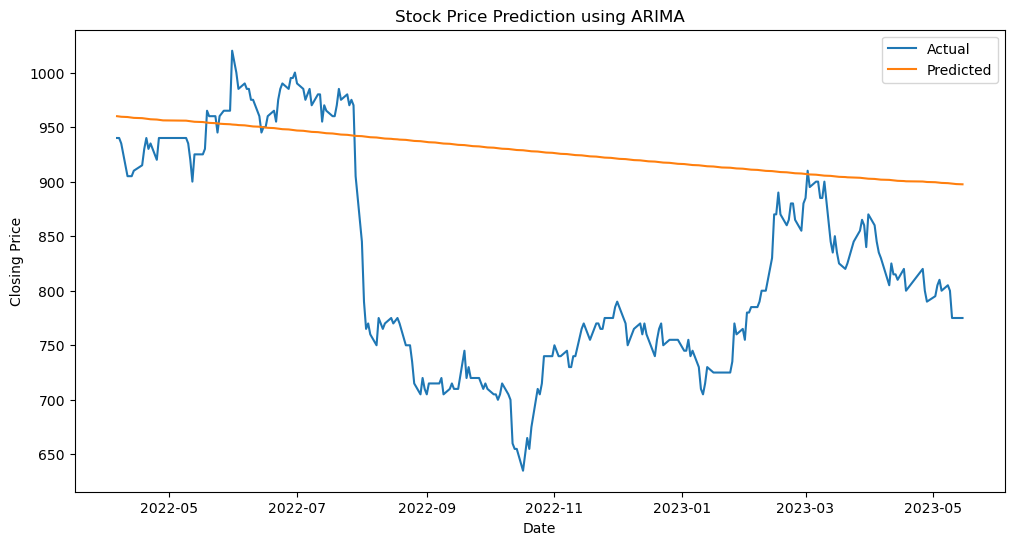

In [13]:
# Menampilkan grafik hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Prediction using ARIMA')
plt.legend()
plt.show()